In [4]:
try:
    import lovely_tensors as lt
except:
    ! pip install --upgrade lovely-tensors
    import lovely_tensors as lt
    
lt.monkey_patch()

In [34]:
# from huggingface_hub import login
# login()

In [38]:
# !pip install -U diffusers

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

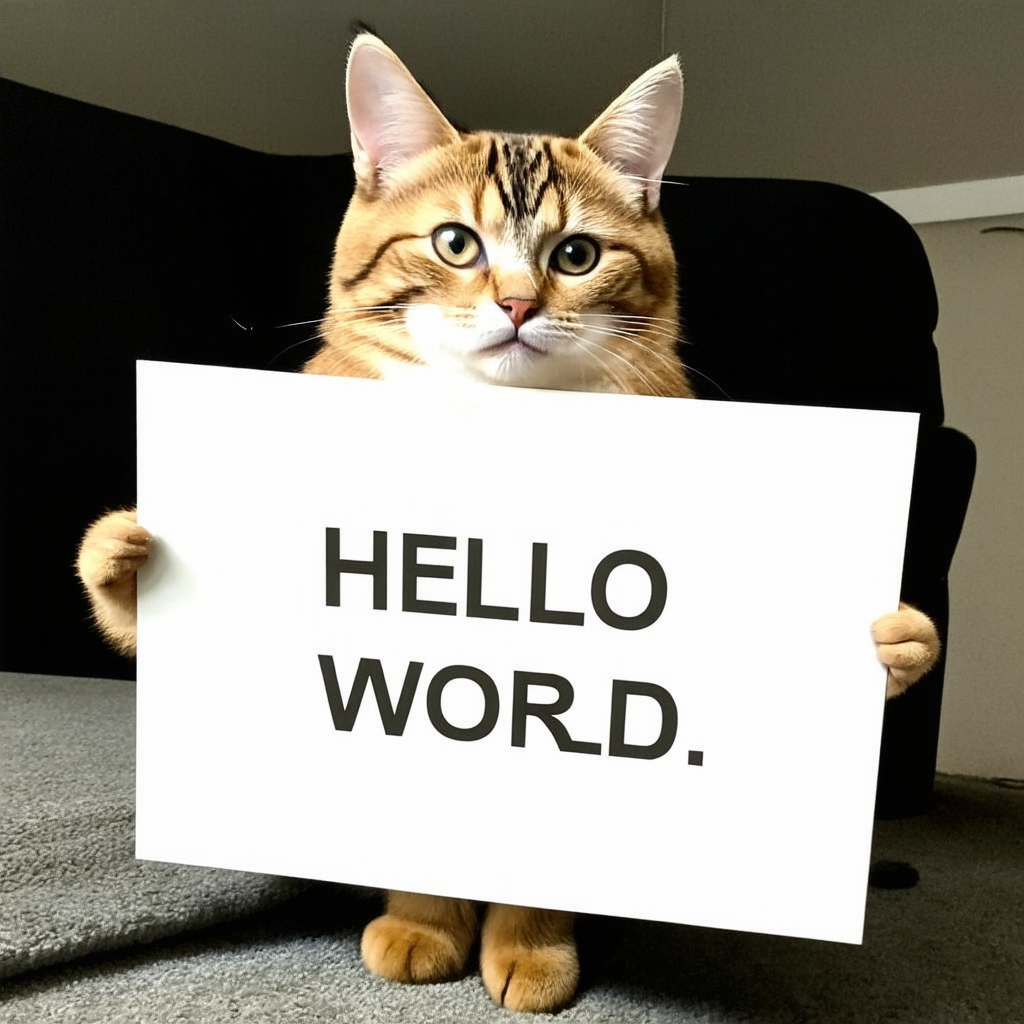

In [2]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16
).to("cuda")

image = pipe(
    "A cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
    num_images_per_prompt=5
).images[0]
image

In [55]:
image = pipe(
    "A cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
    num_images_per_prompt=5
)

  0%|          | 0/28 [00:00<?, ?it/s]

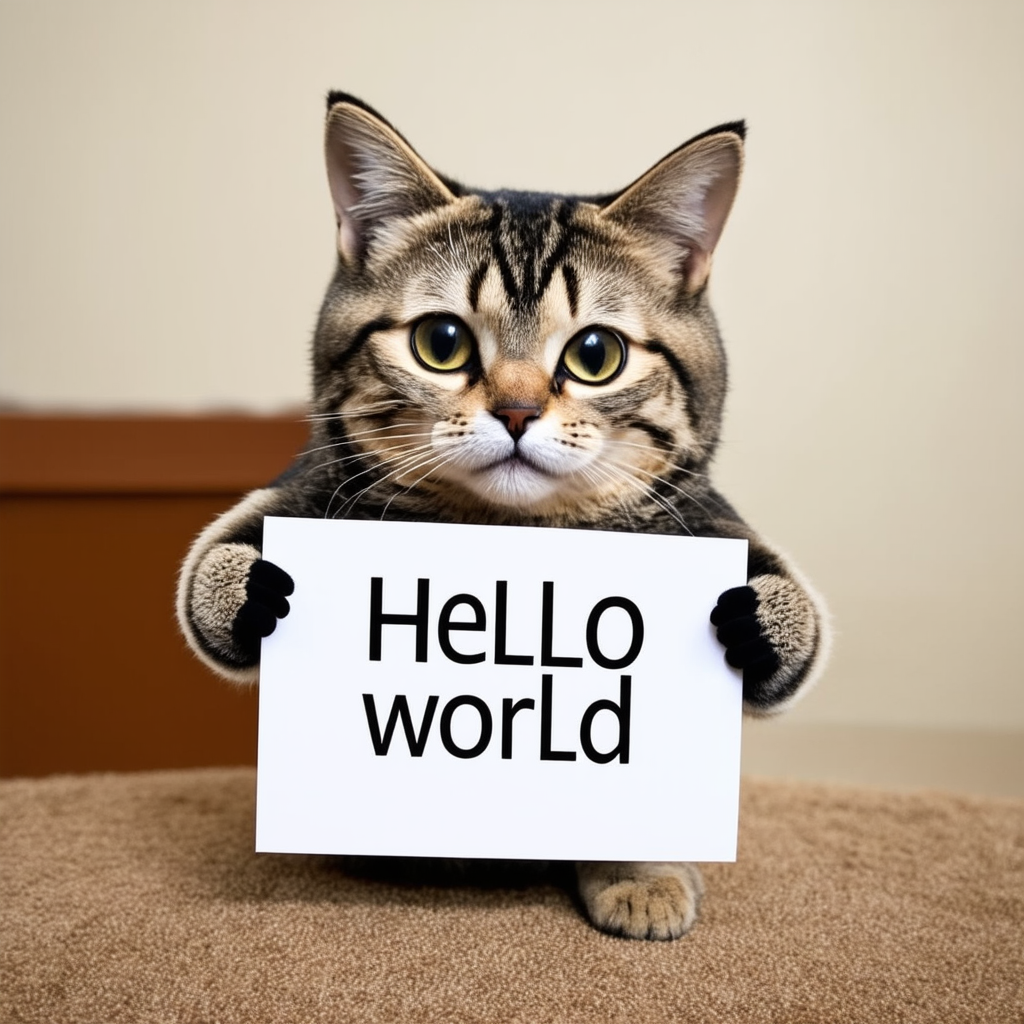

In [60]:
image.images[2]

In [18]:
pipe.__call__?

Signature:
pipe.__call__(
    prompt: Union[str, List[str]] = None,
    prompt_2: Union[str, List[str], NoneType] = None,
    prompt_3: Union[str, List[str], NoneType] = None,
    height: Optional[int] = None,
    width: Optional[int] = None,
    num_inference_steps: int = 28,
    timesteps: List[int] = None,
    guidance_scale: float = 7.0,
    negative_prompt: Union[str, List[str], NoneType] = None,
    negative_prompt_2: Union[str, List[str], NoneType] = None,
    negative_prompt_3: Union[str, List[str], NoneType] = None,
    num_images_per_prompt: Optional[int] = 1,
    generator: Union[torch._C.Generator, List[torch._C.Generator], NoneType] = None,
    latents: Optional[torch.FloatTensor] = None,
    prompt_embeds: Optional[torch.FloatTensor] = None,
    negative_prompt_embeds: Optional[torch.FloatTensor] = None,
    pooled_prompt_embeds: Optional[torch.FloatTensor] = None,
    negative_pooled_prompt_embeds: Optional[torch.FloatTensor] = None,
    output_type: Optional[str] = 'pil

  0%|          | 0/28 [00:00<?, ?it/s]

[tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.840, 4.508] μ=-0.004 σ=0.326 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.744, 4.129] μ=-0.002 σ=0.323 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.104, 3.514] μ=-0.000 σ=0.333 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-2.822, 3.422] μ=-0.000 σ=0.349 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-2.977, 3.416] μ=-0.001 σ=0.361 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.021, 3.391] μ=-0.002 σ=0.367 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.178, 3.408] μ=-0.002 σ=0.378 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.295, 3.275] μ=-0.003 σ=0.384 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.371, 3.271] μ=-0.004 σ=0.392 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.449, 3.326] μ=-0.004 σ=0.398 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb) x∈[-3.537, 3.352] μ=-0.005 σ=0.407 cuda:0, tensor[2, 4096, 1536] f16 n=12582912 (24Mb

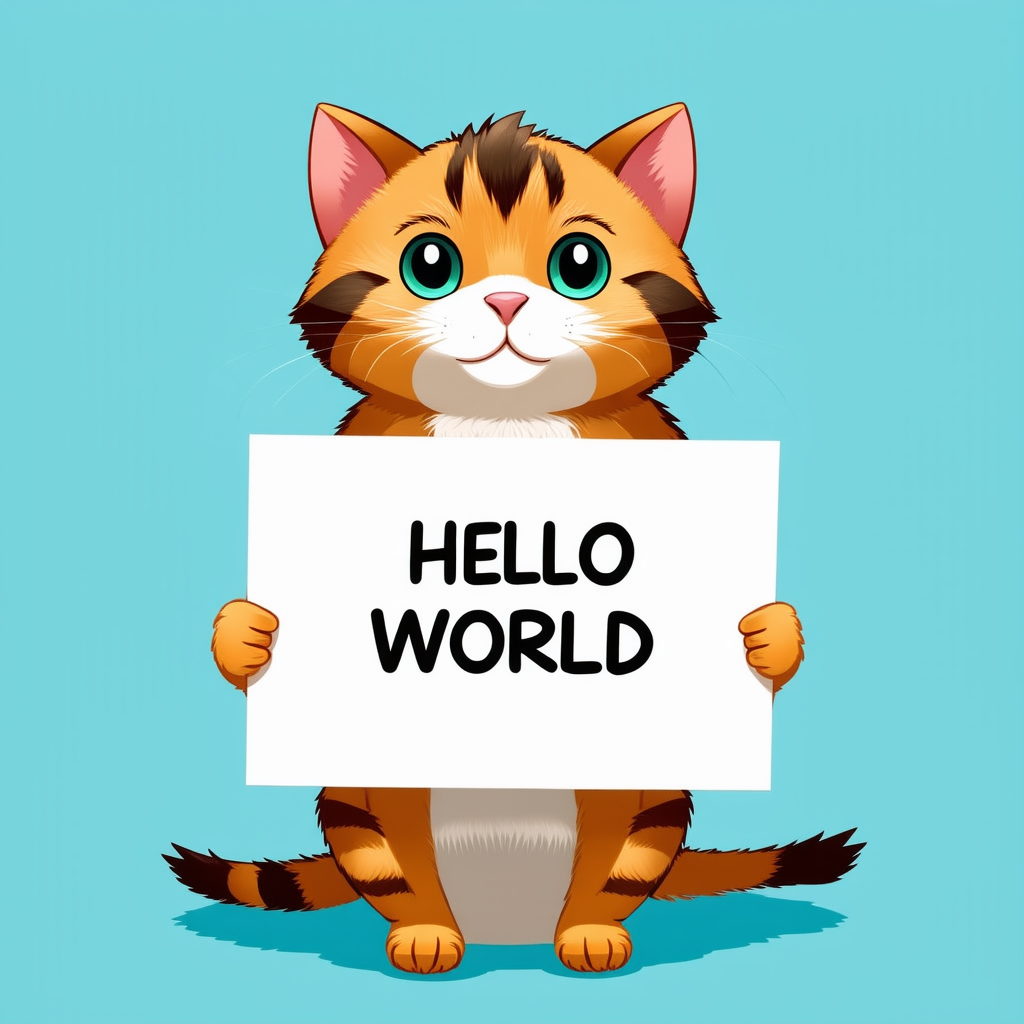

In [6]:
import torch

def save_input(module, input, output):
    """ Saves the input to a global list """
    global saved_inputs
    saved_inputs.append(input[0].detach())

saved_inputs = []

model = pipe.transformer.transformer_blocks[0].attn
to_out_layer = model.to_out[0]
hook_handle = to_out_layer.register_forward_hook(save_input)

outputs = pipe("A cat holding a sign that says hello world")

hook_handle.remove()

print(saved_inputs)

outputs.images[0]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

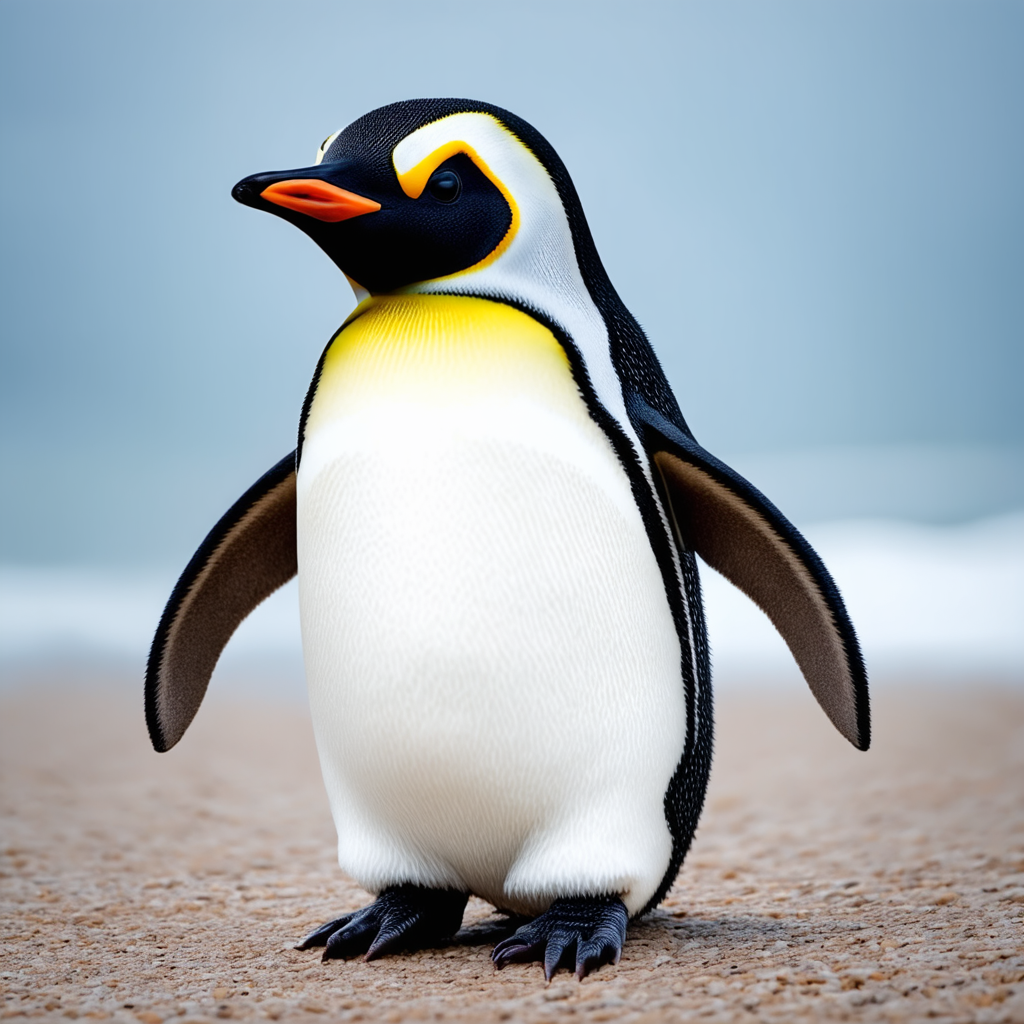

In [62]:
import random

generator = torch.Generator(device="cuda:0").manual_seed(42)

animals = ['cat', 'dog', 'horse', 'penguin']
text_notext = [" holding a sign that says hello world", ""]

rand_animal = random.choice(animals)
rand_text_notext = random.choice(text_notext)
prompt=f"A {rand_animal}{rand_text_notext}"

outputs = pipe(prompt, height=512, width=512, generator=generator)
outputs = pipe(prompt, height=1024, width=1024)
outputs.images[0]

In [53]:
import random
from pathlib import Path
from tqdm.auto import tqdm

animals = ['cat', 'dog', 'horse', 'penguin']

save_dir = Path('text_notext_images')
text_images = save_dir / 'text'
notext_images = save_dir / 'notext'
text_images.mkdir(exist_ok=True, parents=True)
notext_images.mkdir(exist_ok=True, parents=True)

N = 10

for i in tqdm(list(range(N))):
    rand_animal = random.choice(animals)
    prompt=f"A {rand_animal} holding a sign that says hello world"

    outputs = pipe(prompt, height=1024, width=1024)
    image = outputs.images[0]
    image.save(text_images / f"{i:02}_{prompt}.png")
    
    prompt=f"A {rand_animal}"
    outputs = pipe(prompt, height=1024, width=1024)
    image = outputs.images[0]
    image.save(notext_images / f"{i:02}_{prompt}.png")

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [54]:
28*28

784